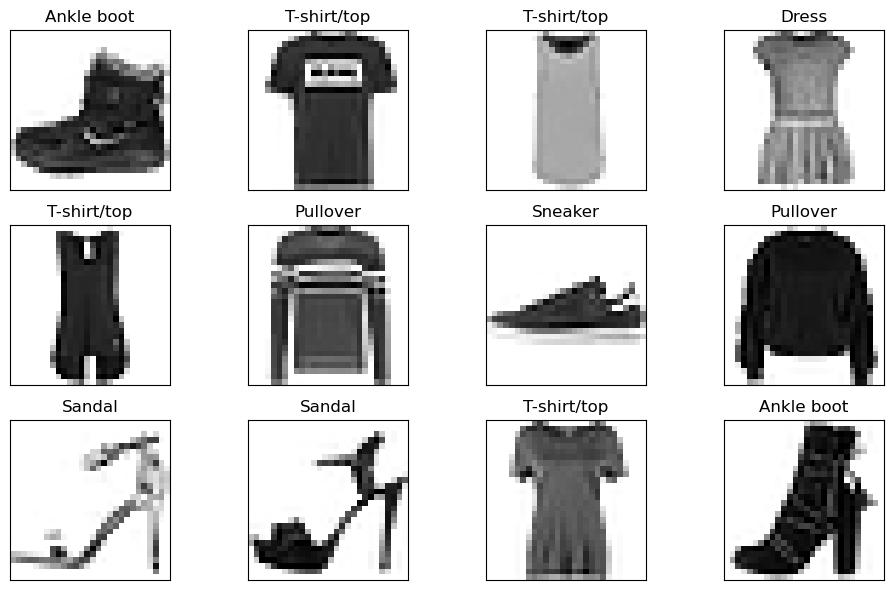

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7563 - loss: 0.6987 - val_accuracy: 0.8492 - val_loss: 0.4142
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8475 - loss: 0.4177 - val_accuracy: 0.8613 - val_loss: 0.3709
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8609 - loss: 0.3708 - val_accuracy: 0.8743 - val_loss: 0.3465
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8750 - loss: 0.3450 - val_accuracy: 0.8747 - val_loss: 0.3456
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8787 - loss: 0.3304 - val_accuracy: 0.8780 - val_loss: 0.3318
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8820 - loss: 0.3172 - val_accuracy: 0.8812 - val_loss: 0.3239
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8824 - loss: 0.3146 - val_accuracy: 0.8790 - val_loss: 0.3261
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8899 - loss: 0.2953 

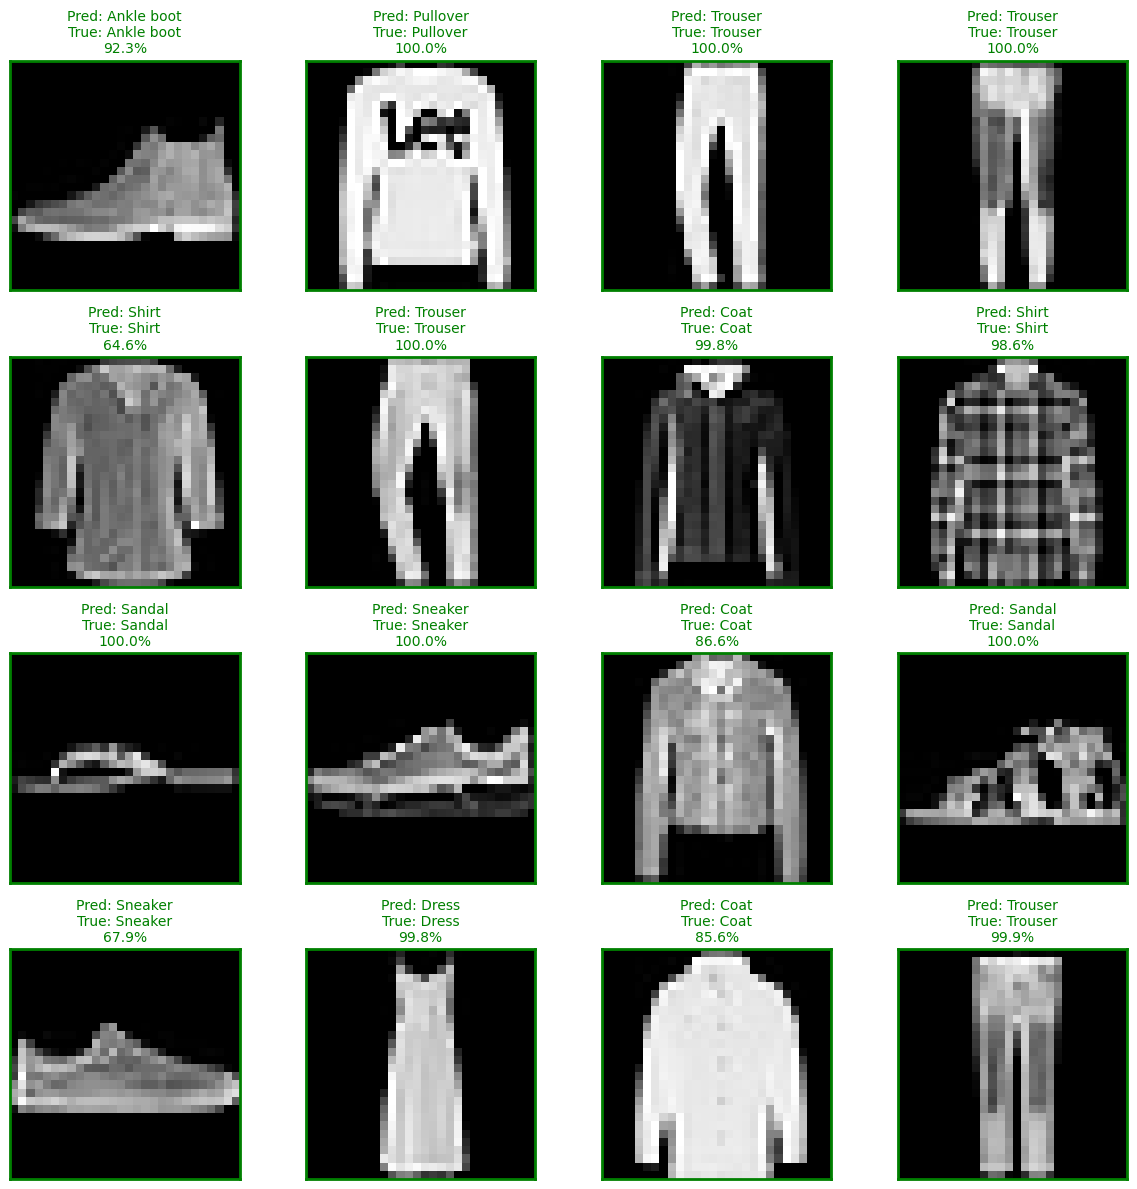


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.83      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.76      0.81      0.79      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.77      0.83      0.80      1000
      Sandal       0.92      0.98      0.95      1000
       Shirt       0.76      0.62      0.68      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.95      0.98      0.96      1000
  Ankle boot       0.98      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



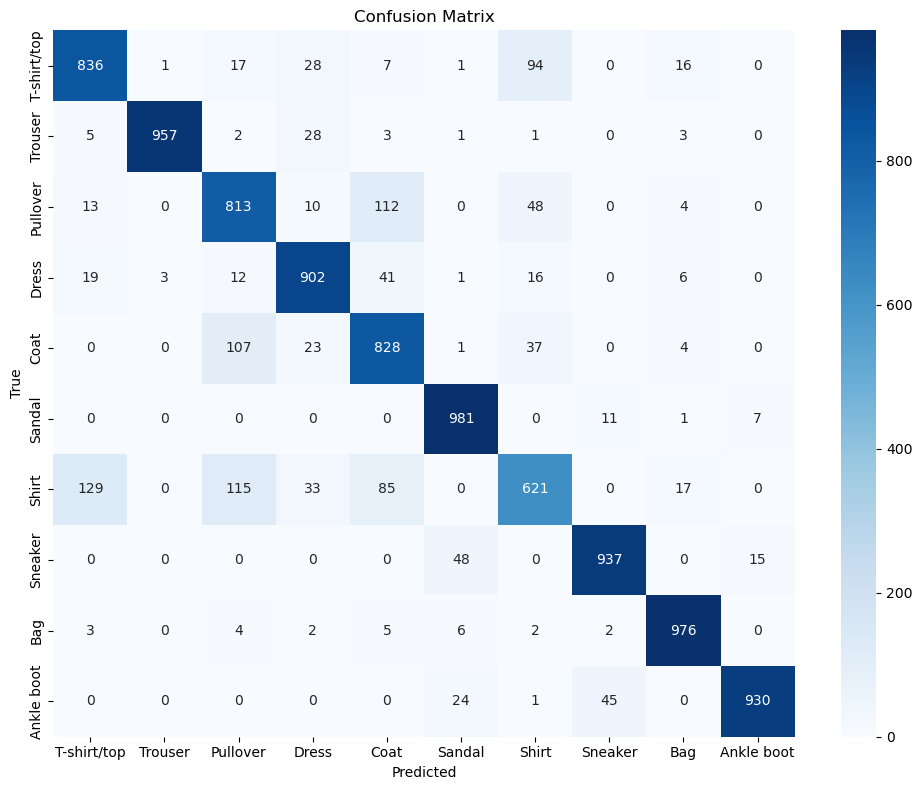

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define class names for output clarity
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize pixel values to 0–1 range
x_train = x_train / 255.0
x_test = x_test / 255.0

# Display sample training images
plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]])
plt.tight_layout()
plt.show()

# Build a simple neural network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(x_test)

# Convert grayscale images to RGB (3 channels) for colorful visualization
def to_rgb(img):
    return np.stack((img,) * 3, axis=-1)

# Function to display colorful prediction results
def plot_colored_predictions(images, predictions, true_labels, class_names, rows=4, cols=4):
    plt.figure(figsize=(cols * 3, rows * 3))

    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        img_rgb = to_rgb(images[i])
        pred_label = np.argmax(predictions[i])
        true_label = true_labels[i]
        confidence = 100 * np.max(predictions[i])
        border_color = 'green' if pred_label == true_label else 'crimson'
        plt.imshow(img_rgb, interpolation='nearest')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}\n{confidence:.1f}%",color=border_color, fontsize=10)
        plt.gca().spines[:].set_visible(True)
        for spine in plt.gca().spines.values():
            spine.set_edgecolor(border_color)
            spine.set_linewidth(2)
    plt.tight_layout()
    plt.show()

# Show high-quality colorful predictions
plot_colored_predictions(x_test, predictions, y_test, class_names)

# Print classification report
y_pred = np.argmax(predictions, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot confusion matrix
conf_mtx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
